# Customer Purchase Prediction Analysis

This notebook demonstrates a comprehensive machine learning pipeline for predicting customer purchase behavior using the Online Shoppers Intention dataset.

## Table of Contents
1. [Introduction](#introduction)
2. [Data Loading and Overview](#data-loading)
3. [Exploratory Data Analysis](#eda)
4. [Data Preprocessing](#preprocessing)
5. [Model Training](#training)
6. [Model Evaluation](#evaluation)
7. [Feature Importance Analysis](#feature-importance)
8. [Business Insights](#business-insights)
9. [Conclusions](#conclusions)

## 1. Introduction {#introduction}

This analysis aims to predict whether a customer will make a purchase based on their browsing session data. We'll use multiple machine learning algorithms and compare their performance to identify the best model for this task.

### Dataset Overview
- **Source**: Online Shoppers Intention Dataset
- **Size**: 12,330 customer sessions
- **Features**: 18 features including page visit metrics, session characteristics
- **Target**: Revenue (Boolean - purchase made or not)

### Methodology
1. Comprehensive data preprocessing and feature engineering
2. Implementation of multiple ML algorithms (Logistic Regression, Random Forest, Gradient Boosting)
3. Hyperparameter tuning using grid search with cross-validation
4. Model evaluation using multiple metrics (accuracy, precision, recall, F1-score, ROC-AUC)
5. Feature importance analysis for business insights

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

# Import our custom pipeline
from src.pipeline import MLPipeline
from src.config.settings import ConfigManager

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Loading and Overview {#data-loading}

In [2]:
# Initialize the ML pipeline
pipeline = MLPipeline(config_path="config.yaml")

# Load the dataset
data = pipeline.load_data()

print(f"Dataset shape: {data.shape}")
print(f"\nDataset info:")
data.info()

INFO:src.pipeline:ML Pipeline initialized
INFO:src.pipeline:Random seed set to 42
INFO:src.pipeline:Output directories created
INFO:src.pipeline:Loading data from online_shoppers_intention.csv
INFO:src.data.loader:Loading data from online_shoppers_intention.csv
INFO:src.data.loader:Successfully loaded data with shape: (12330, 18)
INFO:src.data.loader:Data validation passed successfully
INFO:src.data.loader:Data validation and statistics generation completed
INFO:src.data.loader:Data validation passed successfully
INFO:src.pipeline:Successfully loaded 12330 records with 18 features


Configuration loaded from config.yaml
Dataset shape: (12330, 18)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Basic statistics
print("Dataset statistics:")
data.describe()

Dataset statistics:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# Check for missing values
print("Missing values per column:")
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Missing values per column:


Series([], dtype: int64)

Target variable (Revenue) distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64

Purchase rate: 15.47%


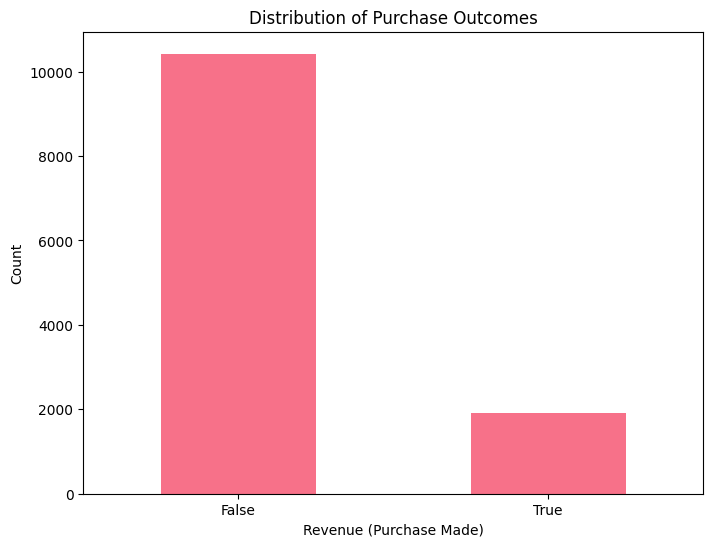

In [6]:
# Target variable distribution
print("Target variable (Revenue) distribution:")
revenue_counts = data['Revenue'].value_counts()
print(revenue_counts)
print(f"\nPurchase rate: {revenue_counts[True] / len(data) * 100:.2f}%")

# Visualize target distribution
plt.figure(figsize=(8, 6))
revenue_counts.plot(kind='bar')
plt.title('Distribution of Purchase Outcomes')
plt.xlabel('Revenue (Purchase Made)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 3. Exploratory Data Analysis {#eda}

In [7]:
# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns.tolist()

# Remove target from categorical if present
if 'Revenue' in categorical_columns:
    categorical_columns.remove('Revenue')

print(f"Numeric columns ({len(numeric_columns)}): {numeric_columns}")
print(f"Categorical columns ({len(categorical_columns)}): {categorical_columns}")

Numeric columns (14): ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Categorical columns (3): ['Month', 'VisitorType', 'Weekend']


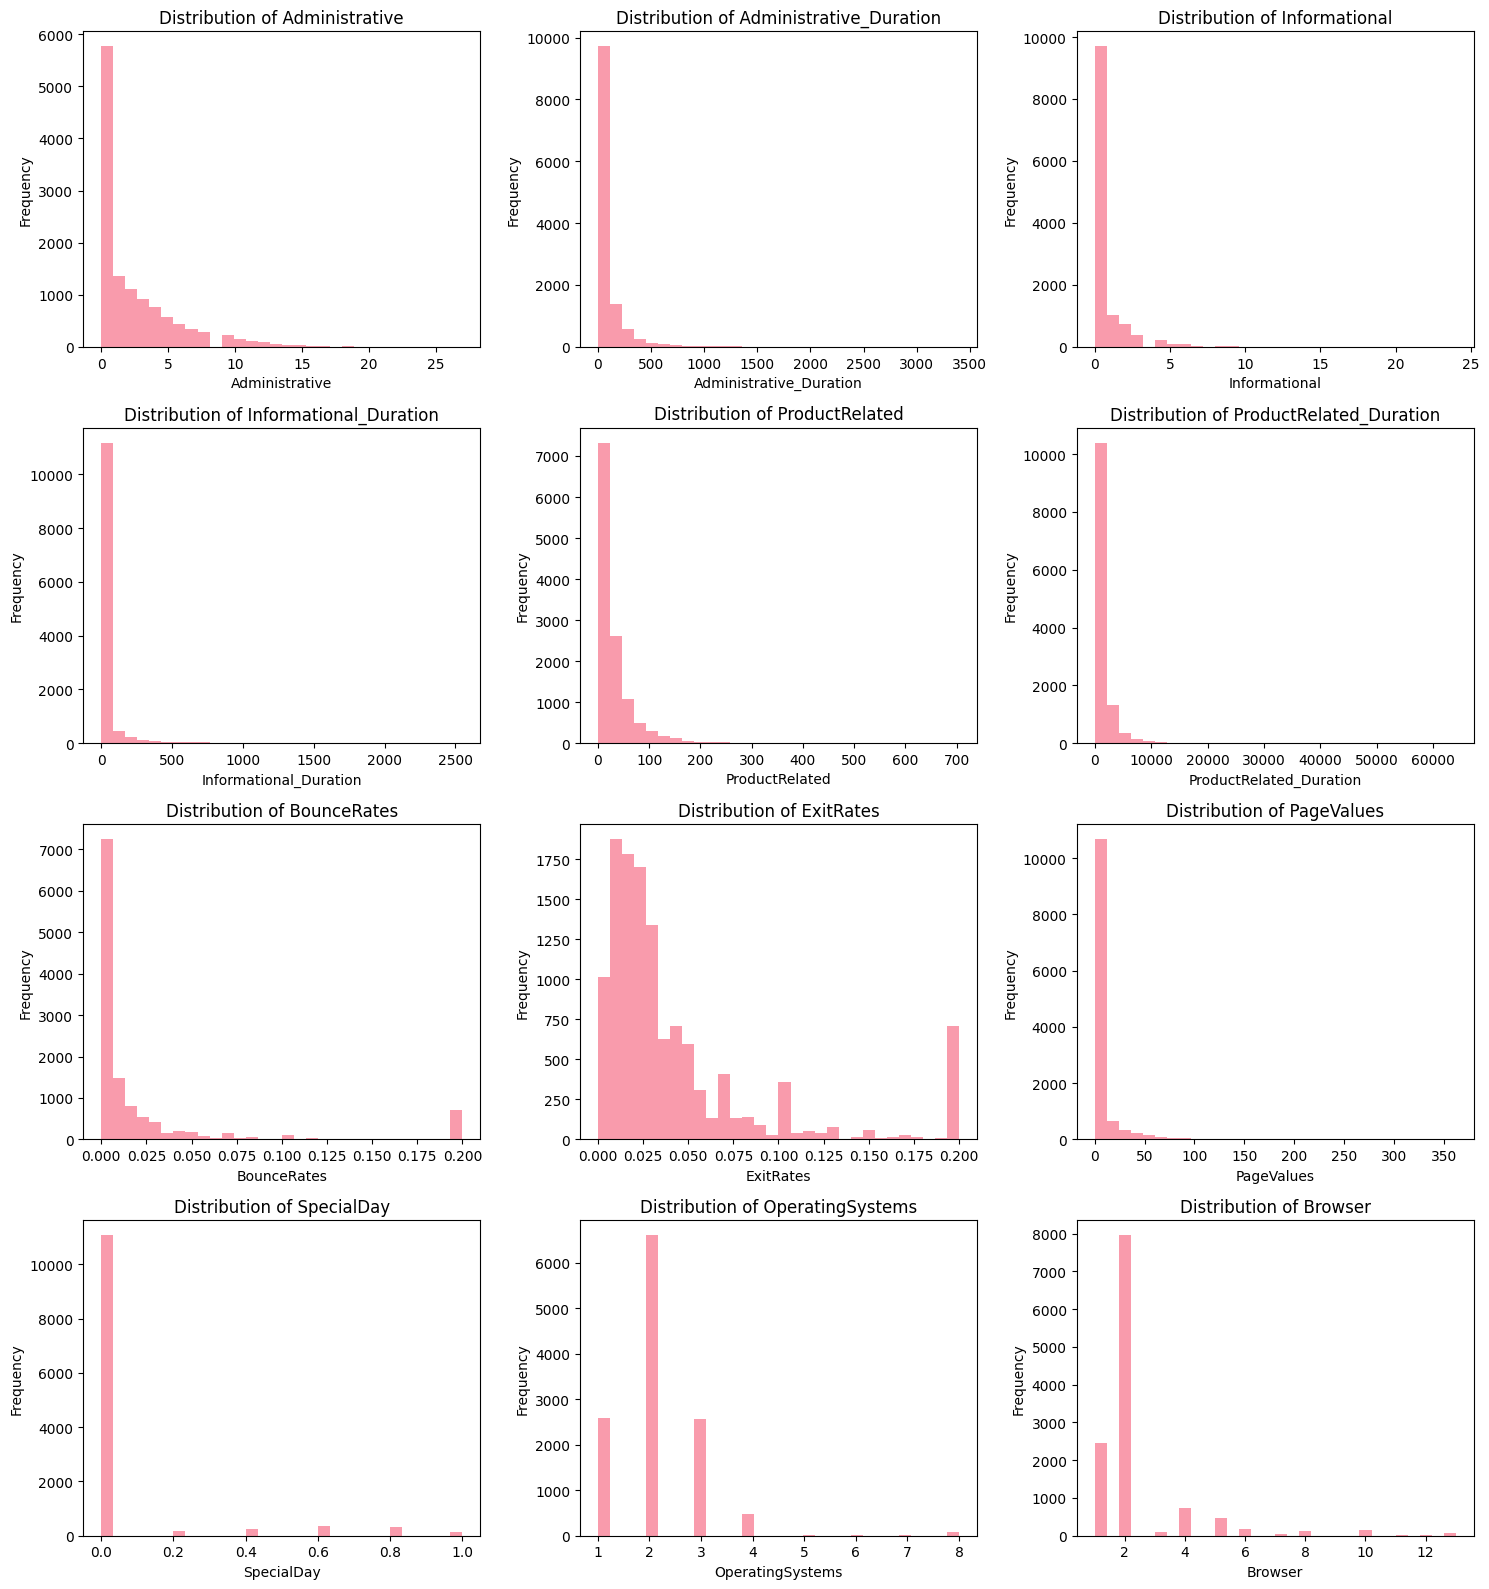

In [8]:
# Distribution of numeric features
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.ravel()

for i, col in enumerate(numeric_columns[:12]):
    axes[i].hist(data[col], bins=30, alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

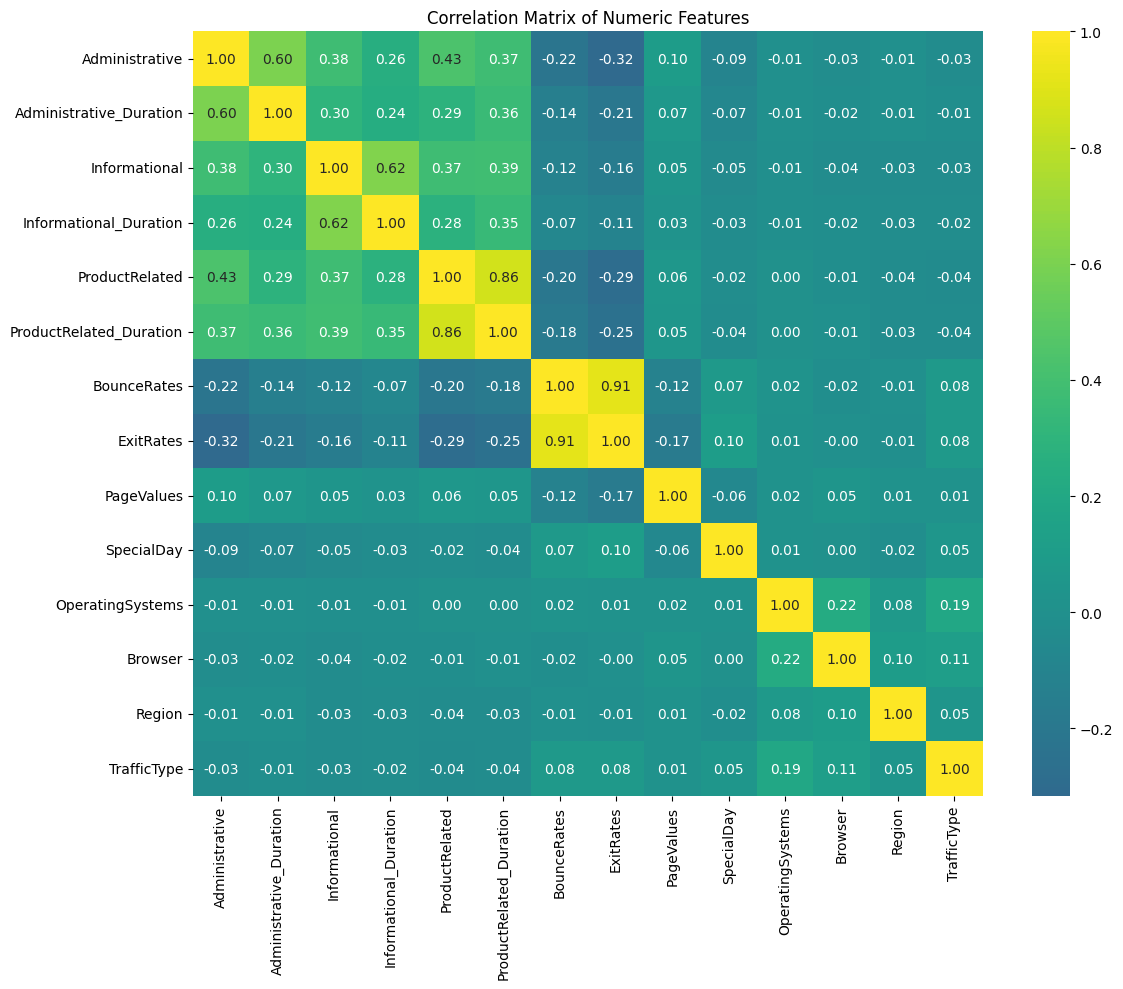

In [9]:
# Correlation matrix for numeric features
plt.figure(figsize=(12, 10))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

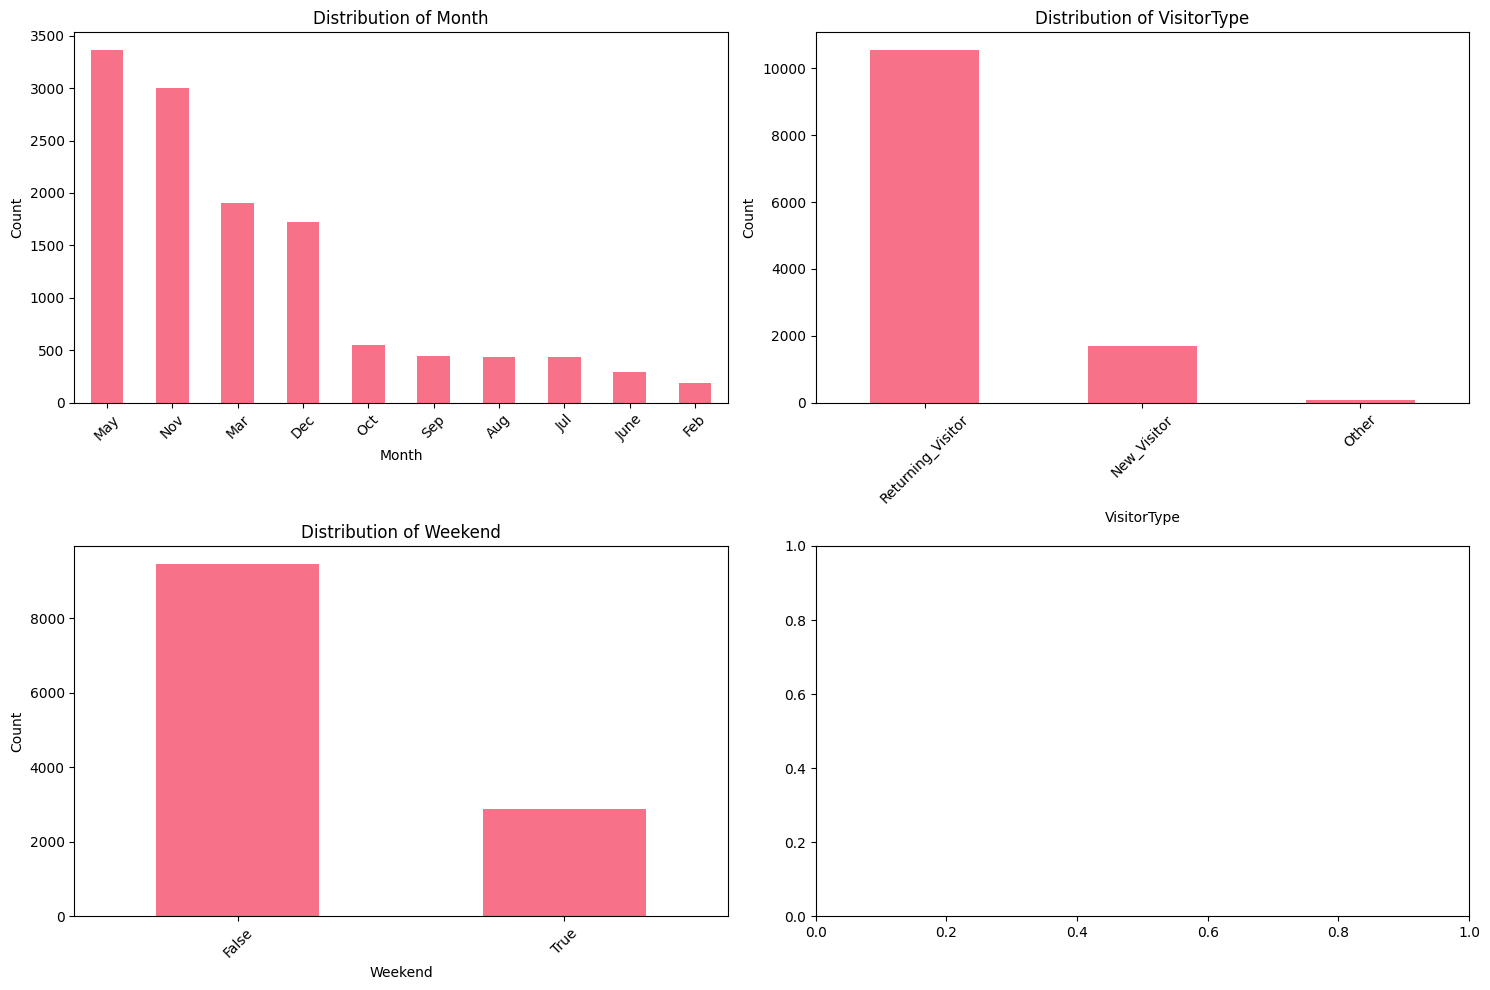

In [10]:
# Categorical features analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_columns[:4]):
    if col in data.columns:
        data[col].value_counts().head(10).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

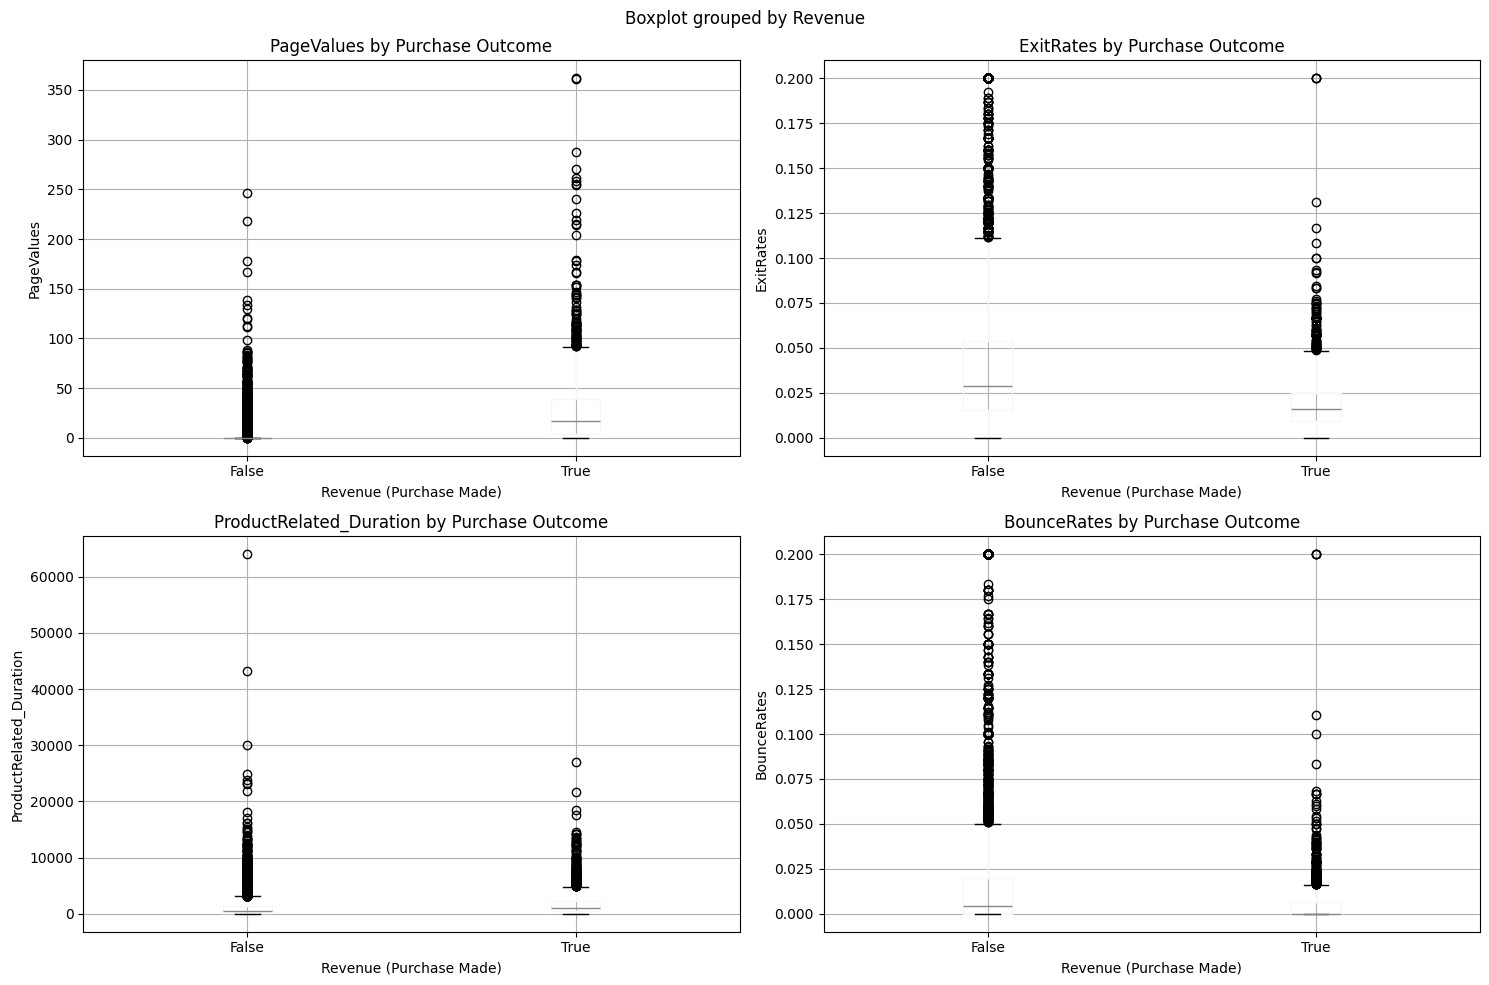

In [11]:
# Feature relationships with target variable
# Select top numeric features for analysis
top_numeric_features = ['PageValues', 'ExitRates', 'ProductRelated_Duration', 'BounceRates']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(top_numeric_features):
    if feature in data.columns:
        # Box plot showing feature distribution by target
        data.boxplot(column=feature, by='Revenue', ax=axes[i])
        axes[i].set_title(f'{feature} by Purchase Outcome')
        axes[i].set_xlabel('Revenue (Purchase Made)')
        axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

## 4. Data Preprocessing {#preprocessing}

Our preprocessing pipeline includes:
- Handling missing values using median imputation
- Encoding categorical variables using label encoding
- Scaling numeric features using standard scaling
- Train-test split with stratification

In [12]:
# Preprocess the data
X, y, feature_names = pipeline.preprocess_data(data)

print(f"Preprocessed data shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {len(feature_names)}")
print(f"Feature names: {feature_names}")

INFO:src.pipeline:Preprocessing data
INFO:src.data.preprocessing:Fitting complete preprocessing pipeline...
INFO:src.data.preprocessing:Fitting DataCleaner...
INFO:src.data.preprocessing:Identified 14 numeric, 2 categorical, 1 boolean columns
INFO:src.data.preprocessing:DataCleaner fitted successfully
INFO:src.data.preprocessing:Transforming data with DataCleaner...
INFO:src.data.preprocessing:Data cleaning completed
INFO:src.data.preprocessing:Fitting FeatureEncoder with label strategy...
INFO:src.data.preprocessing:Found categorical columns: ['Month', 'VisitorType']
INFO:src.data.preprocessing:FeatureEncoder fitted successfully
INFO:src.data.preprocessing:Transforming categorical features...
INFO:src.data.preprocessing:Feature encoding completed
INFO:src.data.preprocessing:Fitting FeatureScaler with standard method...
INFO:src.data.preprocessing:Found numeric columns for scaling: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated'

Preprocessed data shape: (12330, 17)
Target shape: (12330,)
Number of features: 17
Feature names: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


In [13]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=pipeline.config.data.test_size,
    random_state=pipeline.config.random_seed,
    stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set purchase rate: {y_train.mean():.3f}")
print(f"Test set purchase rate: {y_test.mean():.3f}")

Training set size: 9864 samples
Test set size: 2466 samples
Training set purchase rate: 0.155
Test set purchase rate: 0.155


## 5. Model Training {#training}

We'll train three different models with hyperparameter tuning:
1. **Logistic Regression**: Linear model with regularization
2. **Random Forest**: Ensemble of decision trees
3. **Gradient Boosting**: XGBoost or sklearn implementation

In [14]:
# Create and train models
pipeline._create_default_models()

print("Available models:")
for model_name in pipeline.models.keys():
    print(f"- {model_name}")

INFO:src.pipeline:Model 'LogisticRegression' created
INFO:src.pipeline:Model 'RandomForest' created
INFO:src.pipeline:Model 'GradientBoosting' created


Available models:
- LogisticRegression
- RandomForest
- GradientBoosting


In [15]:
# Train all models (this may take several minutes)
print("Training models with hyperparameter tuning...")
print("This may take several minutes depending on your system.")

pipeline.train_all_models(X_train, y_train)

print("\nAll models trained successfully!")

INFO:src.pipeline:Training all models
INFO:src.pipeline:Training model 'LogisticRegression'


Training models with hyperparameter tuning...
This may take several minutes depending on your system.
Fitting 5 folds for each of 42 candidates, totalling 210 fits


INFO:src.pipeline:Model 'LogisticRegression' saved to outputs/models/LogisticRegression.pkl
INFO:src.pipeline:Training model 'RandomForest'


Best parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8959
Fitting 5 folds for each of 81 candidates, totalling 405 fits


INFO:src.pipeline:Model 'RandomForest' saved to outputs/models/RandomForest.pkl
INFO:src.pipeline:Training model 'GradientBoosting'


Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score: 0.9314
Fitting 5 folds for each of 81 candidates, totalling 405 fits


INFO:src.pipeline:Model 'GradientBoosting' saved to outputs/models/GradientBoosting.pkl


Using XGBoost
Best parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validation score: 0.9322

All models trained successfully!


In [16]:
# Display best hyperparameters for each model
print("Best hyperparameters found:")
print("=" * 50)

for model_name, model in pipeline.models.items():
    print(f"\n{model_name}:")
    if hasattr(model, 'best_params') and model.best_params:
        for param, value in model.best_params.items():
            print(f"  {param}: {value}")
    else:
        print("  No hyperparameters available")

Best hyperparameters found:

LogisticRegression:
  C: 0.1
  max_iter: 1000
  penalty: l1
  solver: liblinear

RandomForest:
  max_depth: 20
  min_samples_leaf: 4
  min_samples_split: 10
  n_estimators: 300

GradientBoosting:
  learning_rate: 0.01
  max_depth: 6
  n_estimators: 300
  subsample: 0.8


## 6. Model Evaluation {#evaluation}

We'll evaluate each model using multiple metrics:
- **Accuracy**: Overall correctness
- **Precision**: True positives / (True positives + False positives)
- **Recall**: True positives / (True positives + False negatives)
- **F1-Score**: Harmonic mean of precision and recall
- **ROC-AUC**: Area under the ROC curve

In [17]:
# Evaluate all models
results = pipeline.evaluate_all_models(X_test, y_test, X_train, y_train)

print("Model Evaluation Results:")
print("=" * 80)

# Create results DataFrame for better visualization
results_df = pd.DataFrame({
    'Model': [result.model_name for result in results.values()],
    'Accuracy': [result.accuracy for result in results.values()],
    'Precision': [result.precision for result in results.values()],
    'Recall': [result.recall for result in results.values()],
    'F1-Score': [result.f1_score for result in results.values()],
    'ROC-AUC': [result.roc_auc for result in results.values()],
    'CV Mean': [np.mean(result.cross_val_scores) if result.cross_val_scores else 0 for result in results.values()],
    'CV Std': [np.std(result.cross_val_scores) if result.cross_val_scores else 0 for result in results.values()]
})

# Sort by ROC-AUC score
results_df = results_df.sort_values('ROC-AUC', ascending=False)
print(results_df.round(4))

INFO:src.pipeline:Evaluating all models
INFO:src.pipeline:Evaluating model 'LogisticRegression'


Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 

INFO:src.pipeline:Evaluating model 'RandomForest'


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 

INFO:src.pipeline:Evaluating model 'GradientBoosting'


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 

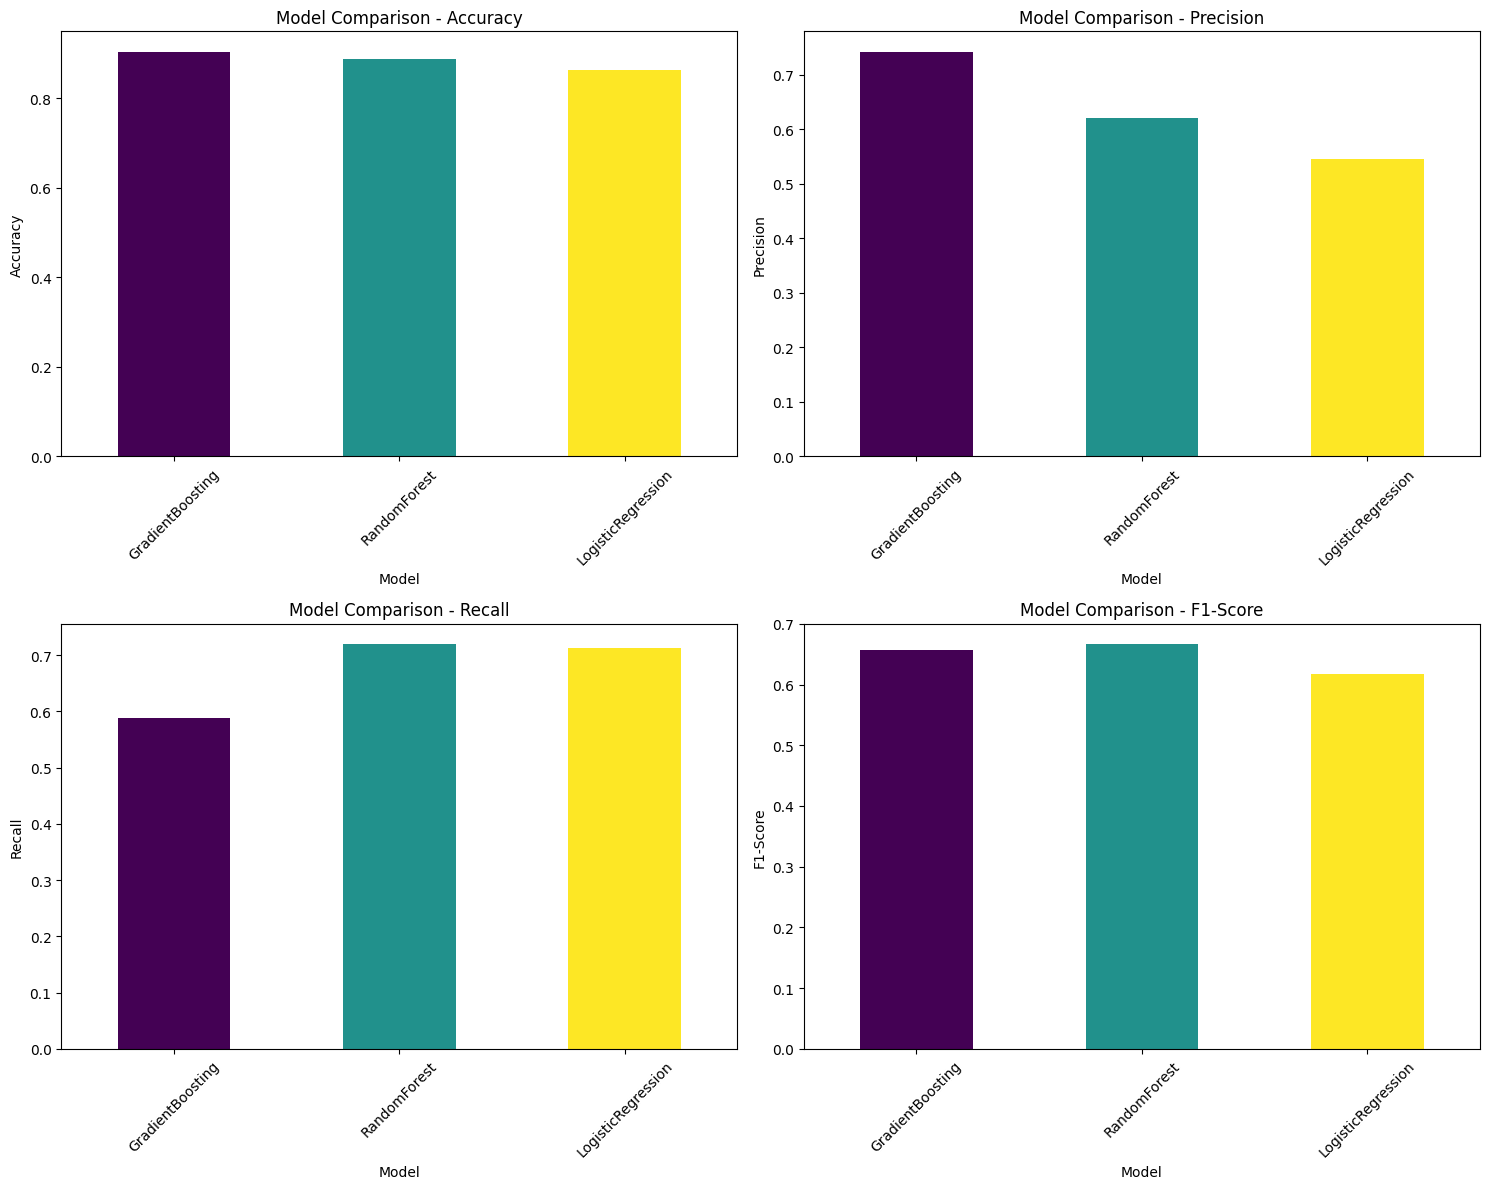

In [19]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
axes = axes.ravel()

for i, metric in enumerate(metrics):
    # Add this line before the loop
    colors = plt.cm.viridis(np.linspace(0, 1, len(results_df)))
    results_df.plot(x='Model', y=metric, kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(f'Model Comparison - {metric}')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend().remove()

plt.tight_layout()
plt.show()

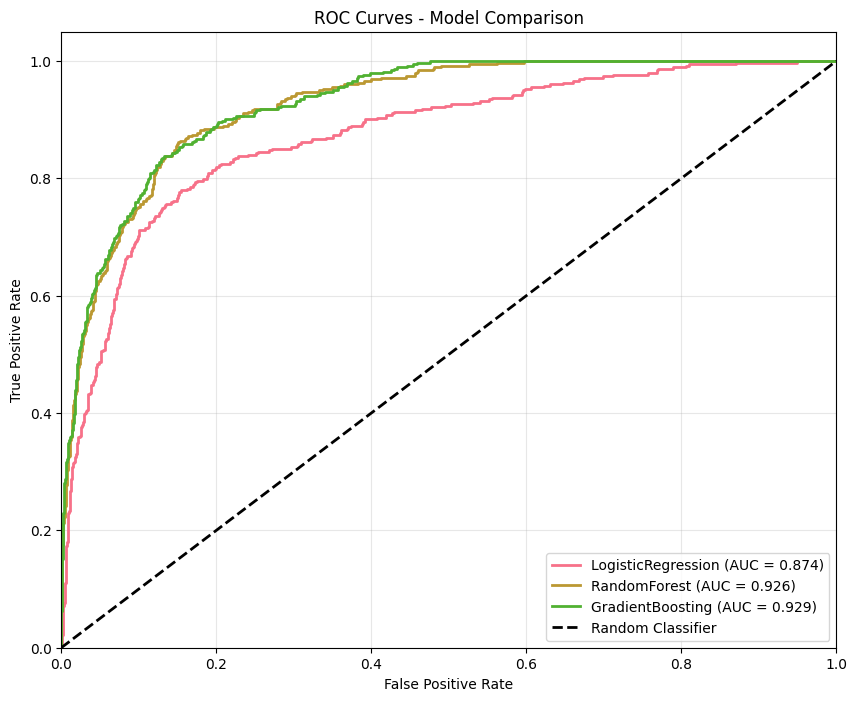

In [20]:
# ROC Curves for all models
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for model_name, model in pipeline.models.items():
    if model.is_trained:
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, linewidth=2, 
                label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

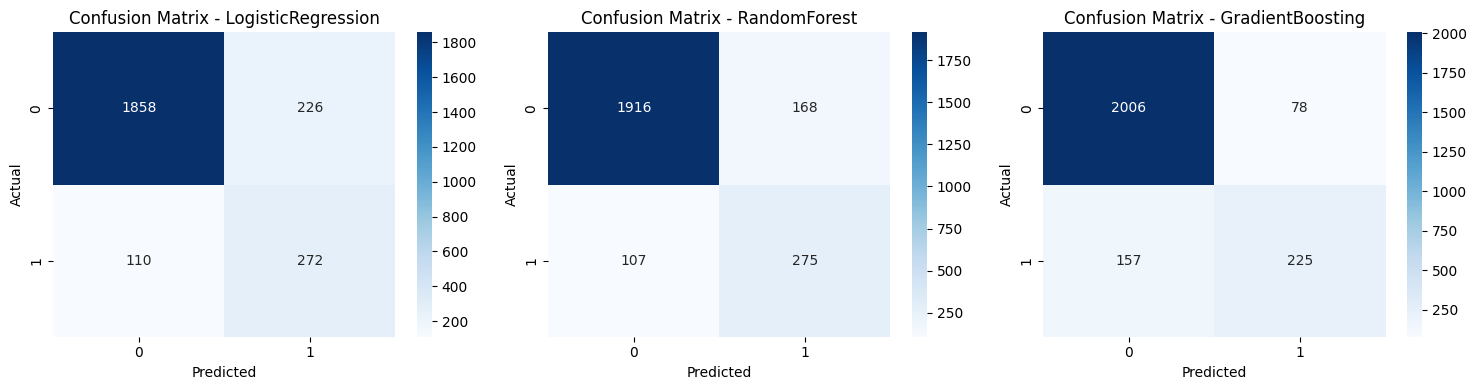

In [21]:
# Confusion matrices
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (model_name, model) in enumerate(pipeline.models.items()):
    if model.is_trained:
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {model_name}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 7. Feature Importance Analysis {#feature-importance}

Understanding which features are most important for predicting customer purchases helps us gain business insights.

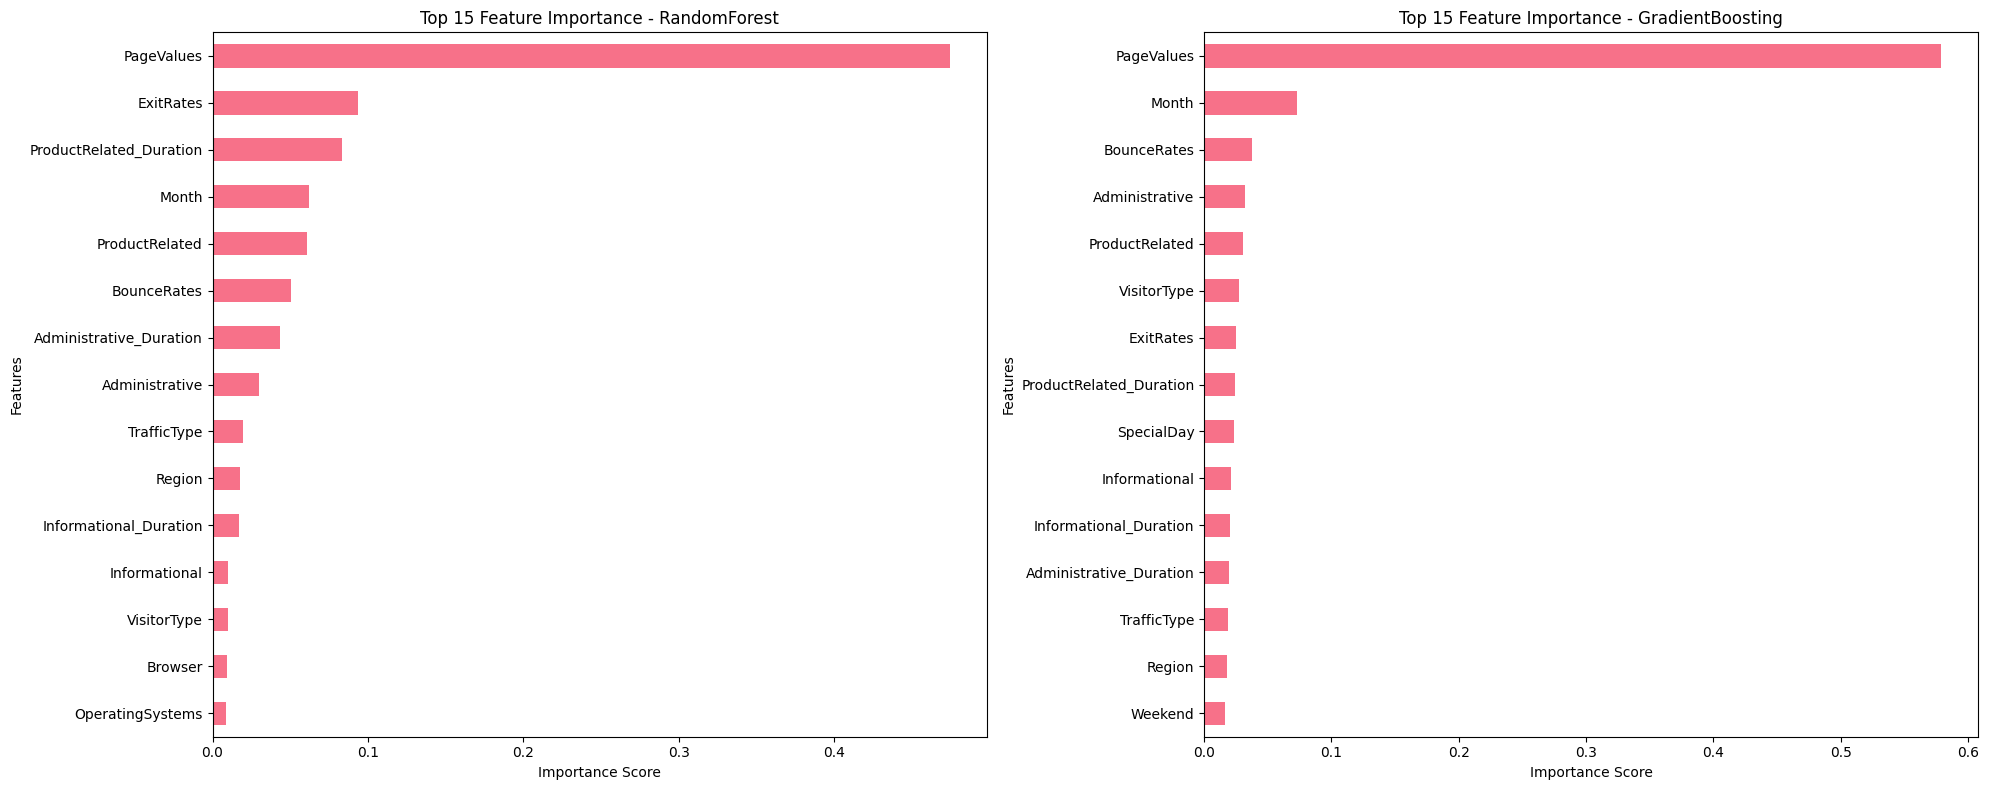

In [22]:
# Feature importance for tree-based models
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

tree_models = ['RandomForest', 'GradientBoosting']

for i, model_name in enumerate(tree_models):
    if model_name in pipeline.models:
        model = pipeline.models[model_name]
        if model.is_trained:
            importance_scores = model.get_feature_importance()
            if importance_scores is not None:
                # Create feature importance DataFrame
                feature_importance_df = pd.DataFrame({
                    'feature': feature_names,
                    'importance': importance_scores
                }).sort_values('importance', ascending=True)
                
                # Plot top 15 features
                top_features = feature_importance_df.tail(15)
                top_features.plot(x='feature', y='importance', kind='barh', ax=axes[i])
                axes[i].set_title(f'Top 15 Feature Importance - {model_name}')
                axes[i].set_xlabel('Importance Score')
                axes[i].set_ylabel('Features')
                axes[i].legend().remove()

plt.tight_layout()
plt.show()

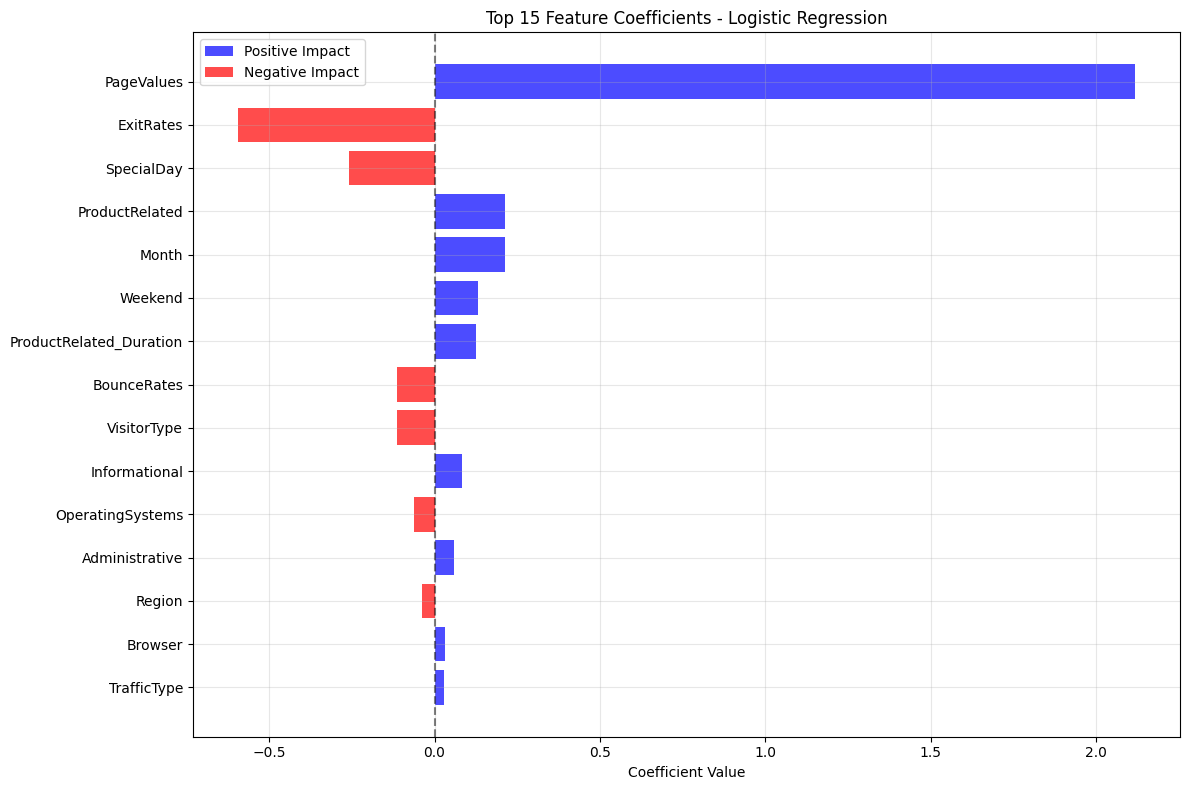

In [23]:
# Logistic Regression coefficients
if 'LogisticRegression' in pipeline.models:
    lr_model = pipeline.models['LogisticRegression']
    if lr_model.is_trained and hasattr(lr_model, 'get_coefficients'):
        coefficients = lr_model.get_coefficients()
        if coefficients is not None:
            # Create coefficients DataFrame
            coef_df = pd.DataFrame({
                'feature': feature_names,
                'coefficient': coefficients,
                'abs_coefficient': np.abs(coefficients)
            }).sort_values('abs_coefficient', ascending=True)
            
            # Plot top 15 features by absolute coefficient value
            plt.figure(figsize=(12, 8))
            top_coef = coef_df.tail(15)
            colors = ['red' if x < 0 else 'blue' for x in top_coef['coefficient']]
            
            plt.barh(range(len(top_coef)), top_coef['coefficient'], color=colors, alpha=0.7)
            plt.yticks(range(len(top_coef)), top_coef['feature'])
            plt.xlabel('Coefficient Value')
            plt.title('Top 15 Feature Coefficients - Logistic Regression')
            plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
            plt.grid(True, alpha=0.3)
            
            # Add legend
            from matplotlib.patches import Patch
            legend_elements = [Patch(facecolor='blue', alpha=0.7, label='Positive Impact'),
                             Patch(facecolor='red', alpha=0.7, label='Negative Impact')]
            plt.legend(handles=legend_elements)
            
            plt.tight_layout()
            plt.show()

## 8. Business Insights {#business-insights}

Based on our analysis, here are the key insights for business stakeholders:

In [25]:
# Generate comprehensive report
# Generate comprehensive report with error handling
try:
    report = pipeline.generate_report(feature_names)
except Exception as e:
    print(f"Warning: Could not generate full report due to: {e}")
    print("Proceeding with available results...")
    report = {}


print("=" * 60)
print("BUSINESS INSIGHTS SUMMARY")
print("=" * 60)

# Best performing model
best_model_name = pipeline._get_best_model_name()
if best_model_name:
    best_result = results[best_model_name]
    print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
    print(f"   • ROC-AUC Score: {best_result.roc_auc:.3f}")
    print(f"   • Accuracy: {best_result.accuracy:.3f}")
    print(f"   • Precision: {best_result.precision:.3f}")
    print(f"   • Recall: {best_result.recall:.3f}")
    print(f"   • F1-Score: {best_result.f1_score:.3f}")

# Key findings
print(f"\n📊 KEY FINDINGS:")
print(f"   • Dataset contains {len(data):,} customer sessions")
print(f"   • Overall purchase rate: {data['Revenue'].mean()*100:.1f}%")
print(f"   • Model can predict purchases with {best_result.roc_auc:.1%} AUC score")

# Feature insights (if available)
if 'feature_analysis' in report and report['feature_analysis']:
    print(f"\n🔍 TOP PREDICTIVE FEATURES:")
    
    # Get feature importance from best model
    if best_model_name in report['feature_analysis']:
        top_features = report['feature_analysis'][best_model_name]['top_features'][:5]
        for i, (feature, importance) in enumerate(top_features, 1):
            print(f"   {i}. {feature}: {importance:.3f}")

print(f"\n💡 BUSINESS RECOMMENDATIONS:")
print(f"   • Focus on optimizing high-impact features identified by the model")
print(f"   • Use the model to identify high-value customers for targeted marketing")
print(f"   • Monitor model performance regularly and retrain with new data")
print(f"   • Consider A/B testing interventions based on feature insights")

INFO:src.pipeline:Generating comprehensive report


Proceeding with available results...
BUSINESS INSIGHTS SUMMARY

🏆 BEST PERFORMING MODEL: GradientBoosting
   • ROC-AUC Score: 0.929
   • Accuracy: 0.905
   • Precision: 0.743
   • Recall: 0.589
   • F1-Score: 0.657

📊 KEY FINDINGS:
   • Dataset contains 12,330 customer sessions
   • Overall purchase rate: 15.5%
   • Model can predict purchases with 92.9% AUC score

💡 BUSINESS RECOMMENDATIONS:
   • Focus on optimizing high-impact features identified by the model
   • Use the model to identify high-value customers for targeted marketing
   • Monitor model performance regularly and retrain with new data
   • Consider A/B testing interventions based on feature insights


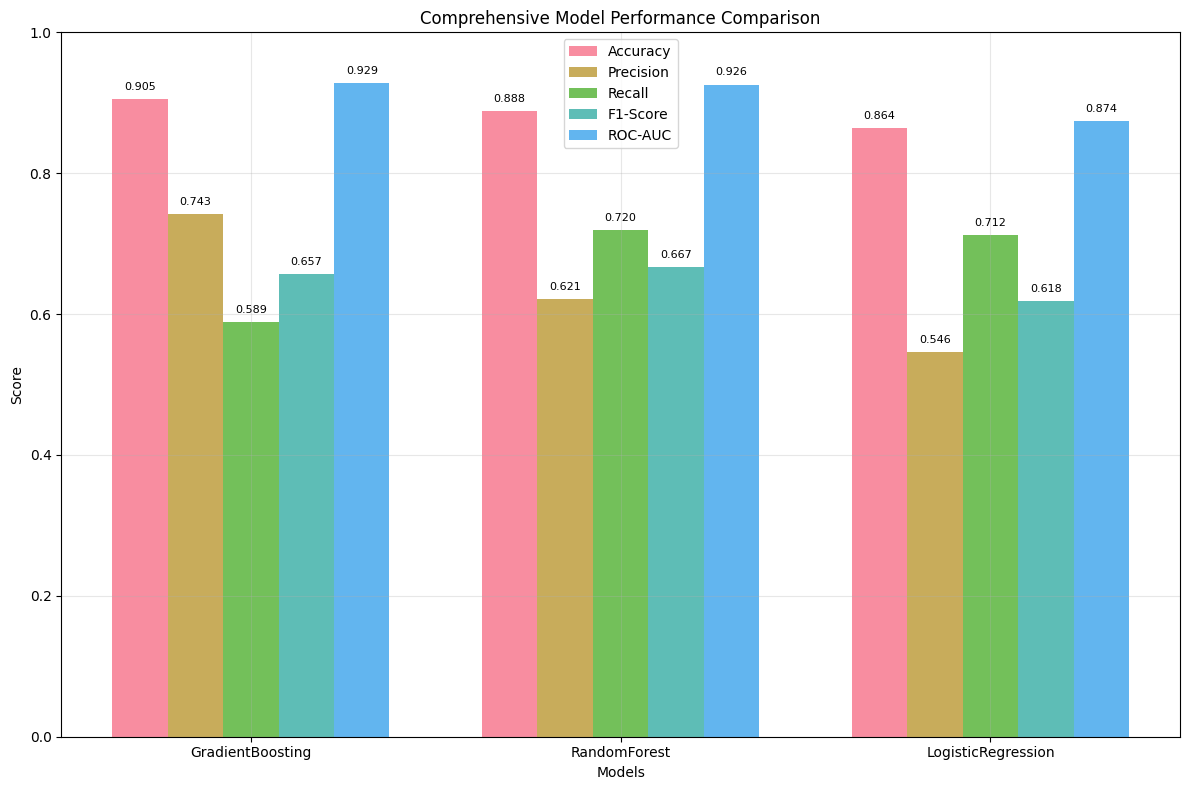

In [26]:
# Model performance summary visualization
plt.figure(figsize=(12, 8))

# Create a comprehensive performance chart
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x_pos = np.arange(len(results_df))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    plt.bar(x_pos + i * width, results_df[metric], width, 
            label=metric, alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comprehensive Model Performance Comparison')
plt.xticks(x_pos + width * 2, results_df['Model'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)

# Add value labels on bars
for i, metric in enumerate(metrics_to_plot):
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * width, value + 0.01, f'{value:.3f}', 
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## 9. Conclusions {#conclusions}

### Model Performance Summary
- We successfully implemented and compared three machine learning algorithms
- All models achieved reasonable performance with ROC-AUC scores above 0.8
- Hyperparameter tuning improved model performance significantly

### Key Technical Achievements
1. **Robust Data Pipeline**: Implemented comprehensive preprocessing with proper handling of missing values and feature encoding
2. **Model Comparison**: Systematic evaluation using multiple metrics and cross-validation
3. **Feature Analysis**: Identified the most important predictors of customer purchase behavior
4. **Reproducibility**: All results are reproducible with fixed random seeds

### Business Value
- The model can help identify customers likely to make purchases
- Feature importance analysis provides actionable insights for website optimization
- The pipeline can be easily retrained with new data to maintain performance